# **Capstone Project (Machine Learning)**
- **1.1. Bank ✅**
- **1.2. Bank Full ✅**
- 2.1. Bank Additional
- 2.2. Bank Additional Full


# **1. Import Library**

In [ ]:
import zipfile # Mengekstrak file .zip
import pandas as pd # Data manipulation & analysis (DataFrame).
import numpy as np # Operasi numerik & array.
import seaborn as sns # Visualisasi data statistik.
import matplotlib.pyplot as plt # Visualisasi data dasar.
import math # Fungsi matematika dasar.

# --- Preprocessing & Data Splitting ---
from sklearn.preprocessing import StandardScaler # Standardisasi fitur numerik.
from sklearn.model_selection import train_test_split # Membagi data (Train/Test).

# --- Evaluasi Metrik (Penting untuk Imbalanced Data) ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Metrik dasar.
from sklearn.metrics import recall_score, accuracy_score, roc_curve, auc, precision_score, f1_score # Metrik detail: Recall, Precision, F1, ROC AUC.

# --- Model Klasifikasi ---
from sklearn.tree import DecisionTreeClassifier # Model Pohon Keputusan.
from sklearn.linear_model import LogisticRegression # Model Baseline Linear.
from sklearn.neighbors import KNeighborsClassifier # Model berbasis jarak (KNN).
from sklearn.svm import SVC, LinearSVC, NuSVC # Model Support Vector Machine (SVM).
from sklearn.naive_bayes import GaussianNB # Model Naive Bayes.

# --- Model Ensemble (Performa Tinggi) ---
from sklearn.ensemble import RandomForestClassifier # Ensemble: Random Forest.
from sklearn.ensemble import AdaBoostClassifier # Ensemble: Adaptive Boosting.
from sklearn.ensemble import GradientBoostingClassifier # Ensemble: Gradient Boosting.

# **2. Extract File**

In [ ]:
# --- Ekstraksi File ZIP 1: File Induk (bank+marketing.zip) ---
local_zip = '/content/bank+marketing.zip' # Tentukan path file
zip_ref = zipfile.ZipFile(local_zip, 'r') # Buka file
zip_ref.extractall('/content') # Ekstrak semua data
zip_ref.close() # Tutup file

In [ ]:
# --- Ekstraksi File ZIP 1.1: File Bank Kecil (bank.zip) ---
local_zip = '/content/bank.zip' # Tentukan path file
zip_ref = zipfile.ZipFile(local_zip, 'r') # Buka file
zip_ref.extractall('/content') # Ekstrak semua data
zip_ref.close() # Tutup file

In [ ]:
# --- Ekstraksi File ZIP 1.2: File Bank Tambahan (bank-additional.zip) ---
local_zip = '/content/bank-additional.zip' # Tentukan path file
zip_ref = zipfile.ZipFile(local_zip, 'r') # Buka file
zip_ref.extractall('/content') # Ekstrak semua data
zip_ref.close() # Tutup file

# **3. Isi Dataset**

1.  **age**: Usia nasabah.
2.  **job**: Jenis pekerjaan nasabah (misalnya: `"admin."`, `"blue-collar"`, `"management"`).
3.  **marital**: Status perkawinan nasabah (`"married"`, `"single"`, `"divorced"`).
4.  **education**: Tingkat pendidikan nasabah (`"primary"`, `"secondary"`, `"tertiary"`).
5.  **default**: Apakah nasabah memiliki kredit macet (`"yes"`, `"no"`).
6.  **balance**: Saldo rata-rata tahunan nasabah dalam euro.
7.  **housing**: Apakah nasabah memiliki pinjaman perumahan (`"yes"`, `"no"`).
8.  **loan**: Apakah nasabah memiliki pinjaman pribadi (`"yes"`, `"no"`).
9.  **contact**: Jenis komunikasi kontak terakhir (`"cellular"`, `"telephone"`).
10. **day**: Hari terakhir nasabah dihubungi dalam sebulan.
11. **month**: Bulan terakhir nasabah dihubungi dalam setahun (`"jan"`, `"feb"`, dll.).
12. **duration**: Durasi kontak terakhir dalam detik.
13. **campaign**: Jumlah kontak yang dilakukan selama kampanye ini untuk nasabah ini.
14. **pdays**: Jumlah hari yang berlalu setelah nasabah terakhir dihubungi dari kampanye sebelumnya (-1 berarti belum pernah dihubungi).
15. **previous**: Jumlah kontak yang dilakukan sebelum kampanye ini untuk nasabah ini.
16. **poutcome**: Hasil dari kampanye pemasaran sebelumnya (`"success"`, `"failure"`, `"other"`).
17. **y**: Apakah nasabah berlangganan deposito berjangka (`"yes"`, `"no"`).

In [ ]:
# Memuat dataset sampel (bank.csv):
df = pd.read_csv('/content/bank.csv', sep = ";") # Baca bank.csv (10% data), delimiter ';'.
print(df.head()) # Tampilkan 5 baris pertama untuk cek.

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [ ]:
# Memuat dataset utama (bank-full.csv):
df_full = pd.read_csv('/content/bank-full.csv', sep = ";") # Baca bank-full.csv (data lengkap), delimiter ';'.
print(df_full.head()) # Tampilkan 5 baris pertama untuk cek.

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
df.info() # Cek tipe data & missing values (NaN) data sampel.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df_full.info() # Cek tipe data & missing values (NaN) data UTAMA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df_full.describe() # Tampilkan statistik deskriptif data numerik (min, max, mean, std).

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df_full.isna().sum() # Hitung total missing values (NaN) per kolom.

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df_full.duplicated().sum() # Hitung jumlah baris yang terduplikasi persis.

np.int64(0)

# **4. EDA (Explorary Data Analysis)**

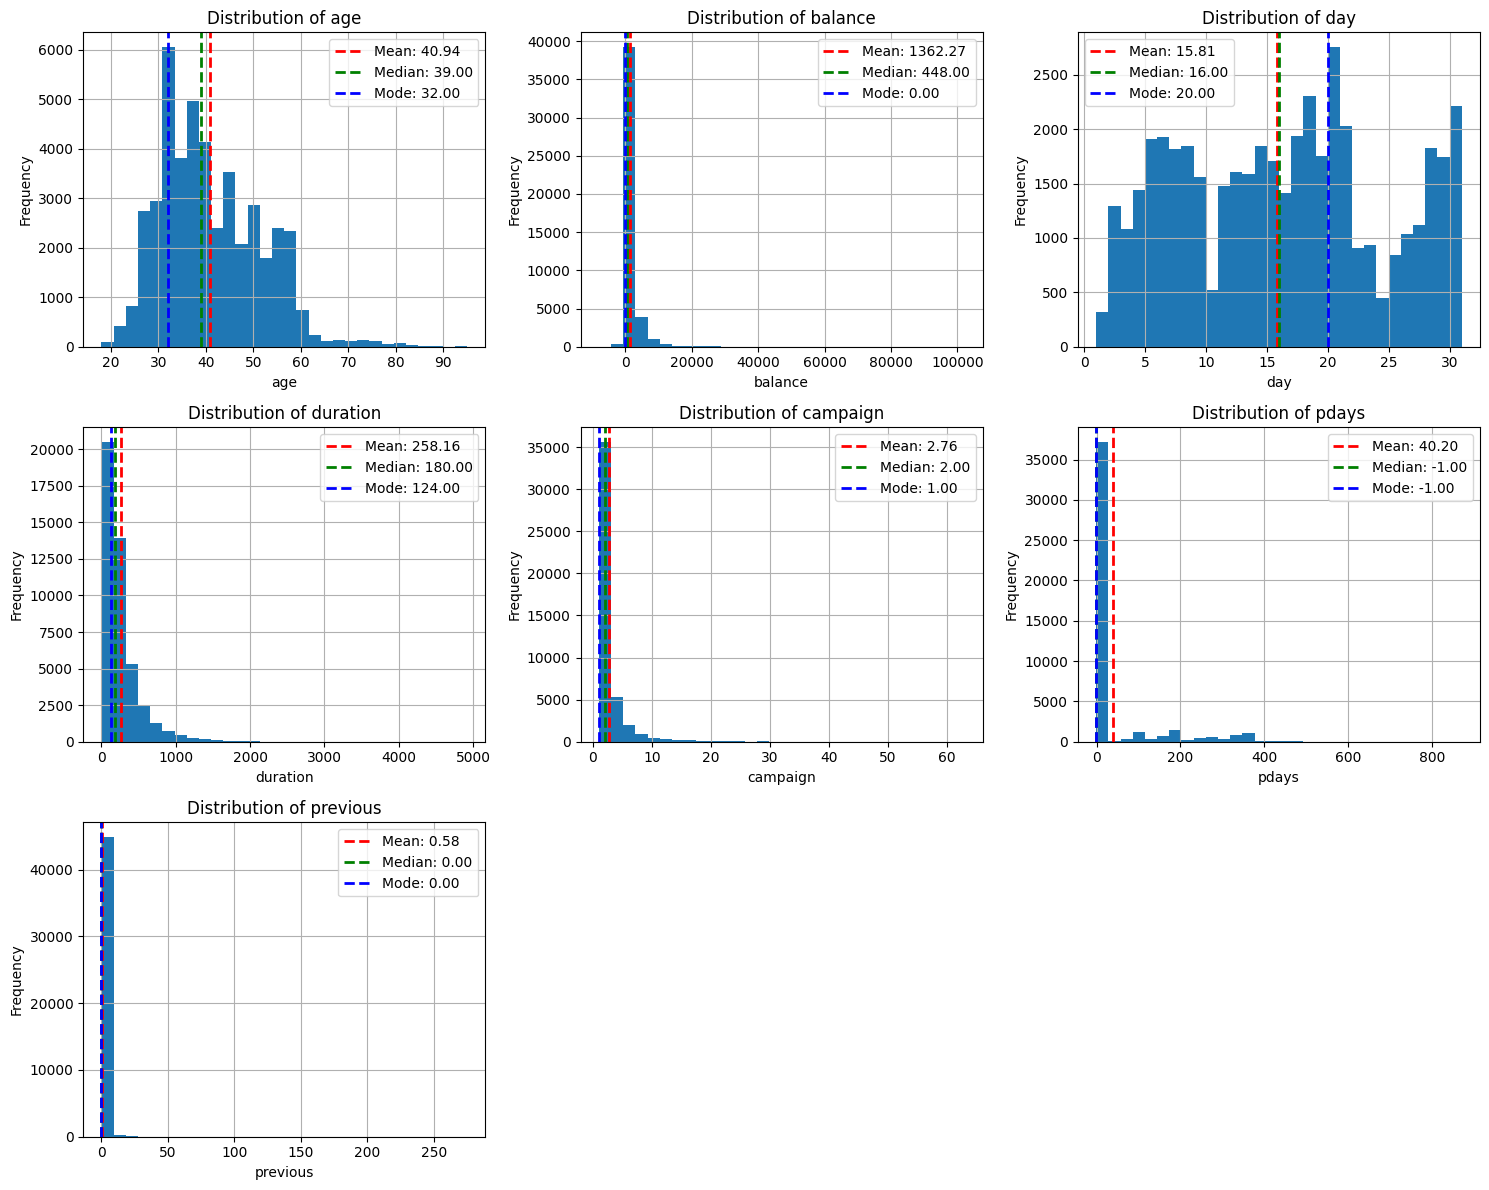

In [ ]:
# EDA Fitur Numerik

numerical_cols = df_full.select_dtypes(include=np.number).columns # Pilih semua kolom yang berisi angka
n_cols = len(numerical_cols) # Hitung jumlah kolom angka
n_plots_per_row = 3 # Tetapkan 3 plot per baris

n_rows = math.ceil(n_cols / n_plots_per_row) # Hitung jumlah baris plot yang dibutuhkan
fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4)) # Buat grid plot (figure dan axes)
axes = axes.flatten() # Ratakan array axes agar mudah di-loop

for i, col in enumerate(numerical_cols): # Loop setiap kolom numerik
    ax = axes[i]

    df_full[col].hist(bins=30, ax=ax) # Gambar Histogram (Distribusi Frekuensi)

    ax.set_title(f'Distribution of {col}') # Beri judul plot
    ax.set_xlabel(col) # Label sumbu X
    ax.set_ylabel('Frequency') # Label sumbu Y

    mean_val = df_full[col].mean() # Hitung Mean
    median_val = df_full[col].median() # Hitung Median
    mode_val = df_full[col].mode()[0] # Hitung Mode

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}') # Tambah garis Mean
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}') # Tambah garis Median
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}') # Tambah garis Mode

    ax.legend() # Tampilkan legenda garis statistik

for i in range(n_cols, len(axes)): # Loop untuk menyembunyikan plot yang kosong
    axes[i].set_visible(False)

plt.tight_layout() # Rapikan jarak antar plot
plt.show() # Tampilkan semua plot

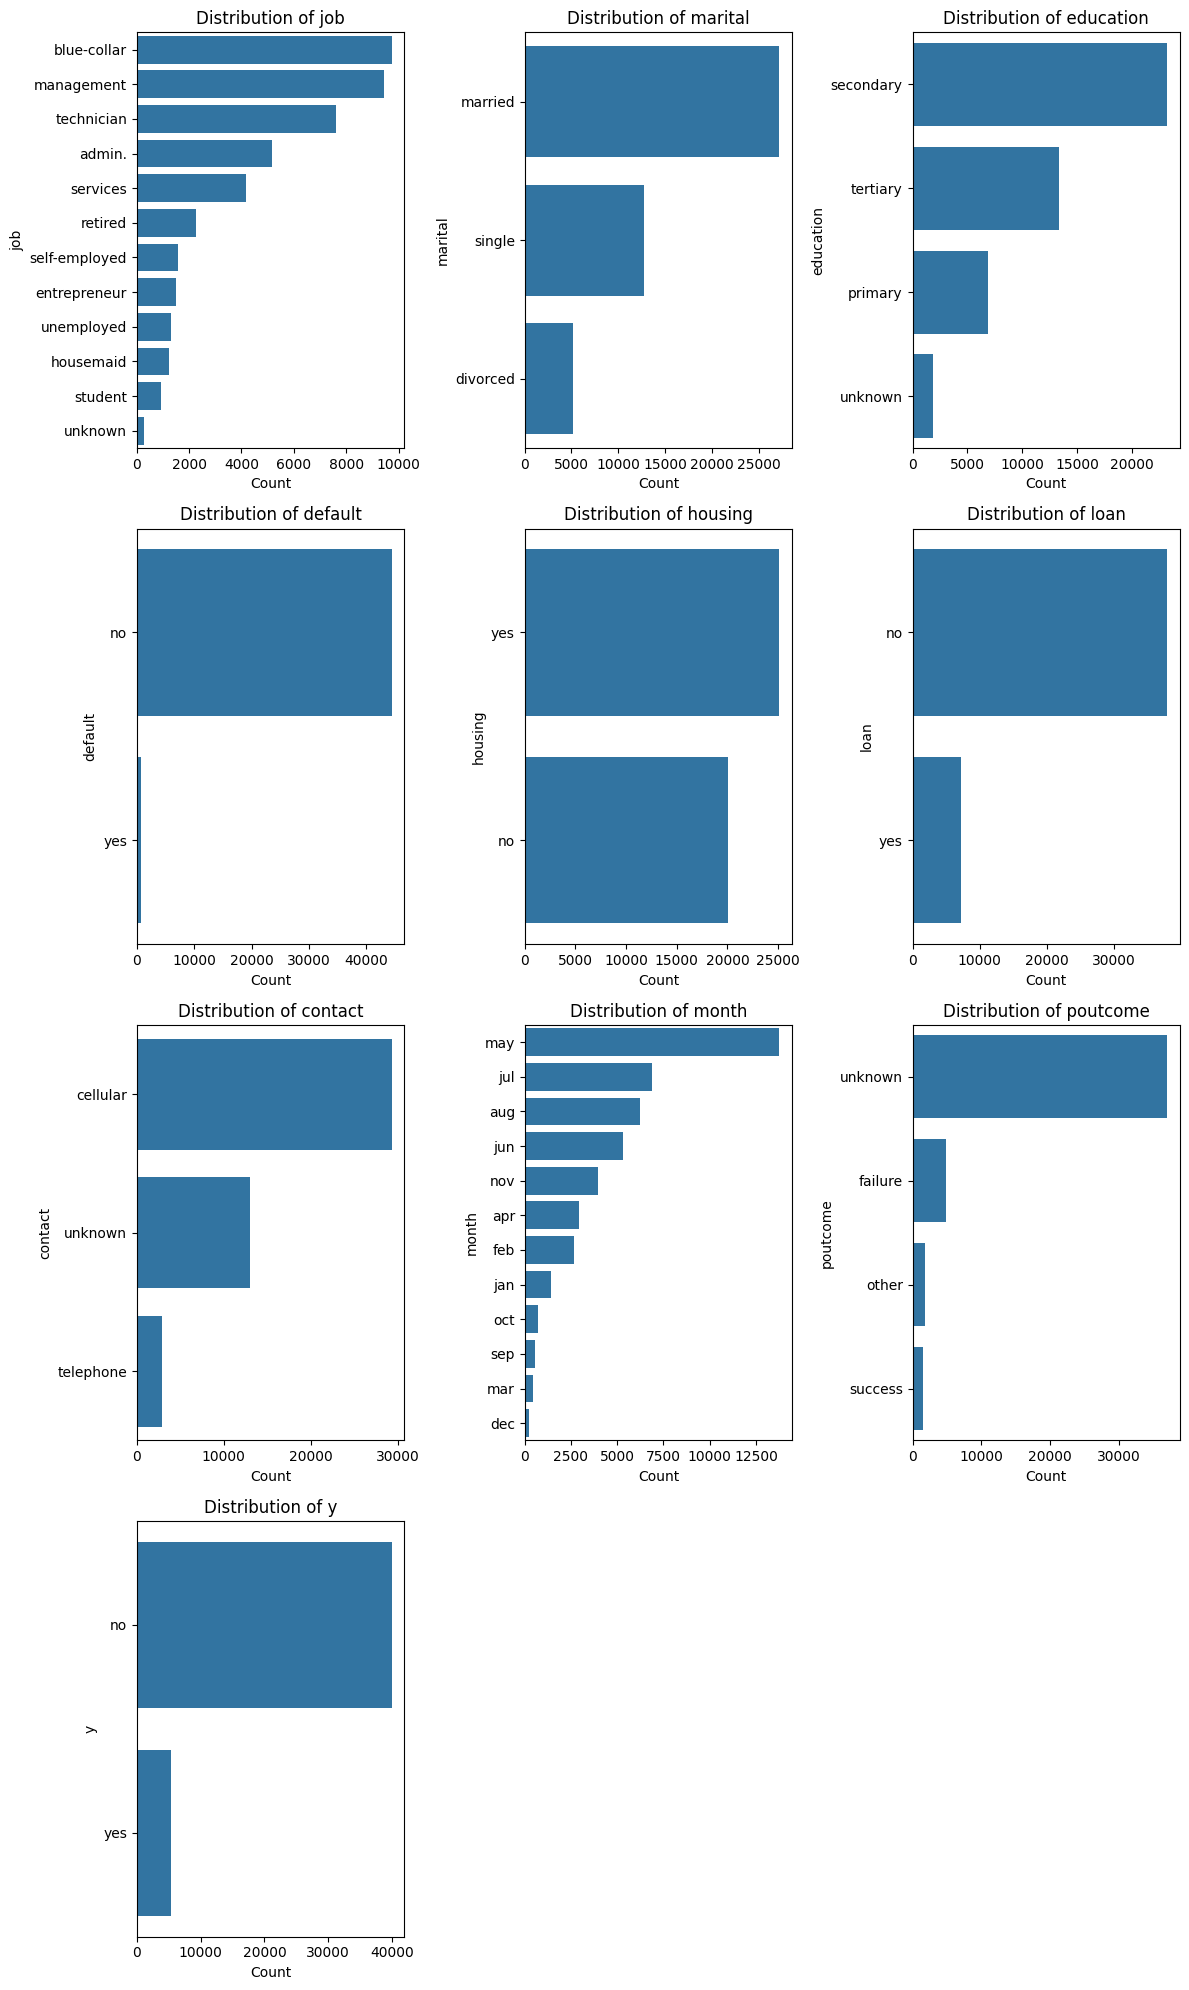

In [ ]:
# EDA Fitur Kategorikal

categorical_cols = df_full.select_dtypes(include=['object', 'category']).columns # Pilih semua kolom teks/kategorikal
n_cols = len(categorical_cols) # Hitung jumlah kolom kategorikal

n_rows = math.ceil(n_cols / n_plots_per_row) # Hitung jumlah baris plot yang dibutuhkan
fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(12, n_rows * 5)) # Buat grid plot

if n_cols == 1: # Penanganan jika hanya ada 1 kolom
    axes = [axes]
else:
    axes = axes.flatten() # Ratakan array axes

for i, col in enumerate(categorical_cols): # Loop setiap kolom kategorikal
    ax = axes[i]

    order = df_full[col].value_counts().index # Urutkan kategori berdasarkan jumlahnya (terbanyak di atas)

    sns.countplot(data=df_full, y=col, order=order, ax=ax) # Gambar Countplot (Bar Chart)

    ax.set_title(f'Distribution of {col}') # Beri judul plot
    ax.set_xlabel('Count') # Label sumbu X
    ax.set_ylabel(col) # Label sumbu Y

for i in range(n_cols, len(axes)): # Loop untuk menyembunyikan plot yang kosong
    axes[i].set_visible(False)

plt.tight_layout() # Rapikan jarak antar plot
plt.show() # Tampilkan semua plot

# **5. Data Preprocessing**

In [ ]:
for col in categorical_cols: # Loop setiap kolom kategorikal
    print(f"Unique values for column '{col}':") # Cetak nama kolom
    print(df_full[col].unique()) # Tampilkan semua nilai unik di kolom tersebut
    print("-" * 30) # Garis pemisah

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values for column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------
Unique values for column 'default':
['no' 'yes']
------------------------------
Unique values for column 'housing':
['yes' 'no']
------------------------------
Unique values for column 'loan':
['no' 'yes']
------------------------------
Unique values for column 'contact':
['unknown' 'cellular' 'telephone']
------------------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
------------------------------
Unique values for column 'poutcome':
['unknown' 'failure' 'other' 'success']
-------------------

In [ ]:
# Imputasi: Ganti 'unknown' di 'default' menjadi 'yes'.
df.loc[df['default'] == 'unknown', 'default'] = 'yes'

In [ ]:
for col in categorical_cols: # Loop setiap kolom kategorikal
    print(f"Unique values for column '{col}':") # Cetak nama kolom
    print(df_full[col].unique()) # Tampilkan semua nilai unik di kolom tersebut
    print("-" * 30) # Garis pemisah

Unique values for column 'job':
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
------------------------------
Unique values for column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values for column 'education':
['tertiary' 'secondary' 'unknown' 'primary']
------------------------------
Unique values for column 'default':
['no' 'yes']
------------------------------
Unique values for column 'housing':
['yes' 'no']
------------------------------
Unique values for column 'loan':
['no' 'yes']
------------------------------
Unique values for column 'contact':
['unknown' 'cellular' 'telephone']
------------------------------
Unique values for column 'month':
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
------------------------------
Unique values for column 'poutcome':
['unknown' 'failure' 'other' 'success']
-------------------

In [ ]:
# Hapus semua baris di mana kolom 'job' memiliki nilai 'unknown'.
df_full = df_full[df_full['job'] != 'unknown']

In [ ]:
df_full = df_full[df_full['education'] != 'unknown'] # Hapus baris di mana education 'unknown'.
df_full = df_full[df_full['contact'] != 'unknown'] # Hapus baris di mana contact type 'unknown'.
df_full = df_full[df_full['poutcome'] != 'unknown'] # Hapus baris di mana poutcome 'unknown'.

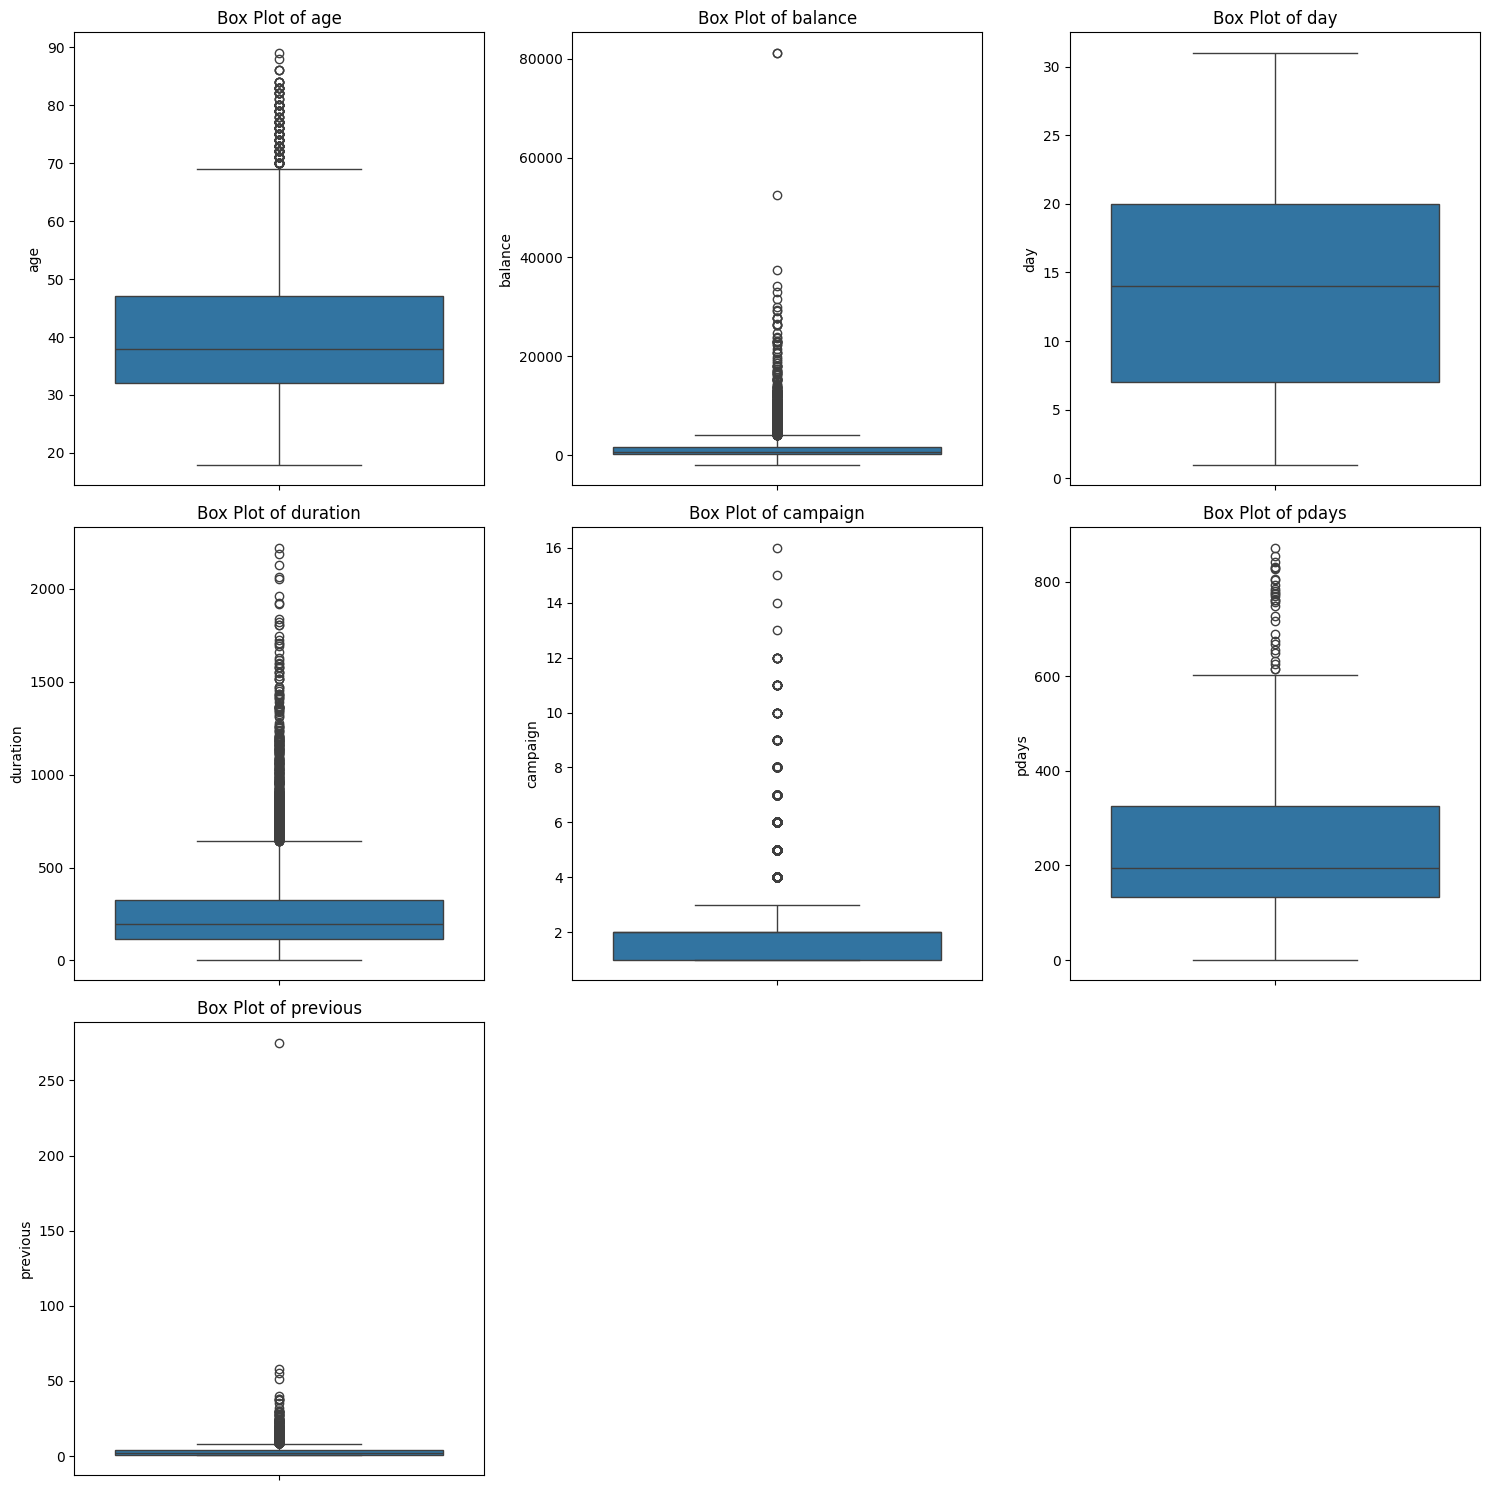

In [ ]:
numerical_cols = df_full.select_dtypes(include=np.number).columns # Pilih semua kolom angka.
n_cols = len(numerical_cols) # Hitung jumlah kolom.
n_plots_per_row = 3 # Tentukan 3 plot per baris.

n_rows = math.ceil(n_cols / n_plots_per_row) # Hitung jumlah baris plot.
fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 5)) # Buat grid plot.
axes = axes.flatten() # Ratakan axes untuk iterasi.

for i, col in enumerate(numerical_cols): # Loop setiap kolom numerik.
    ax = axes[i]
    sns.boxplot(y=df_full[col], ax=ax) # Gambar Box Plot (Vertical).
    ax.set_title(f'Box Plot of {col}') # Beri judul.
    ax.set_ylabel(col) # Label sumbu Y.

for i in range(n_cols, len(axes)): # Sembunyikan plot yang kosong.
    axes[i].set_visible(False)

plt.tight_layout() # Rapikan tata letak plot.
plt.show() # Tampilkan semua Box Plot.

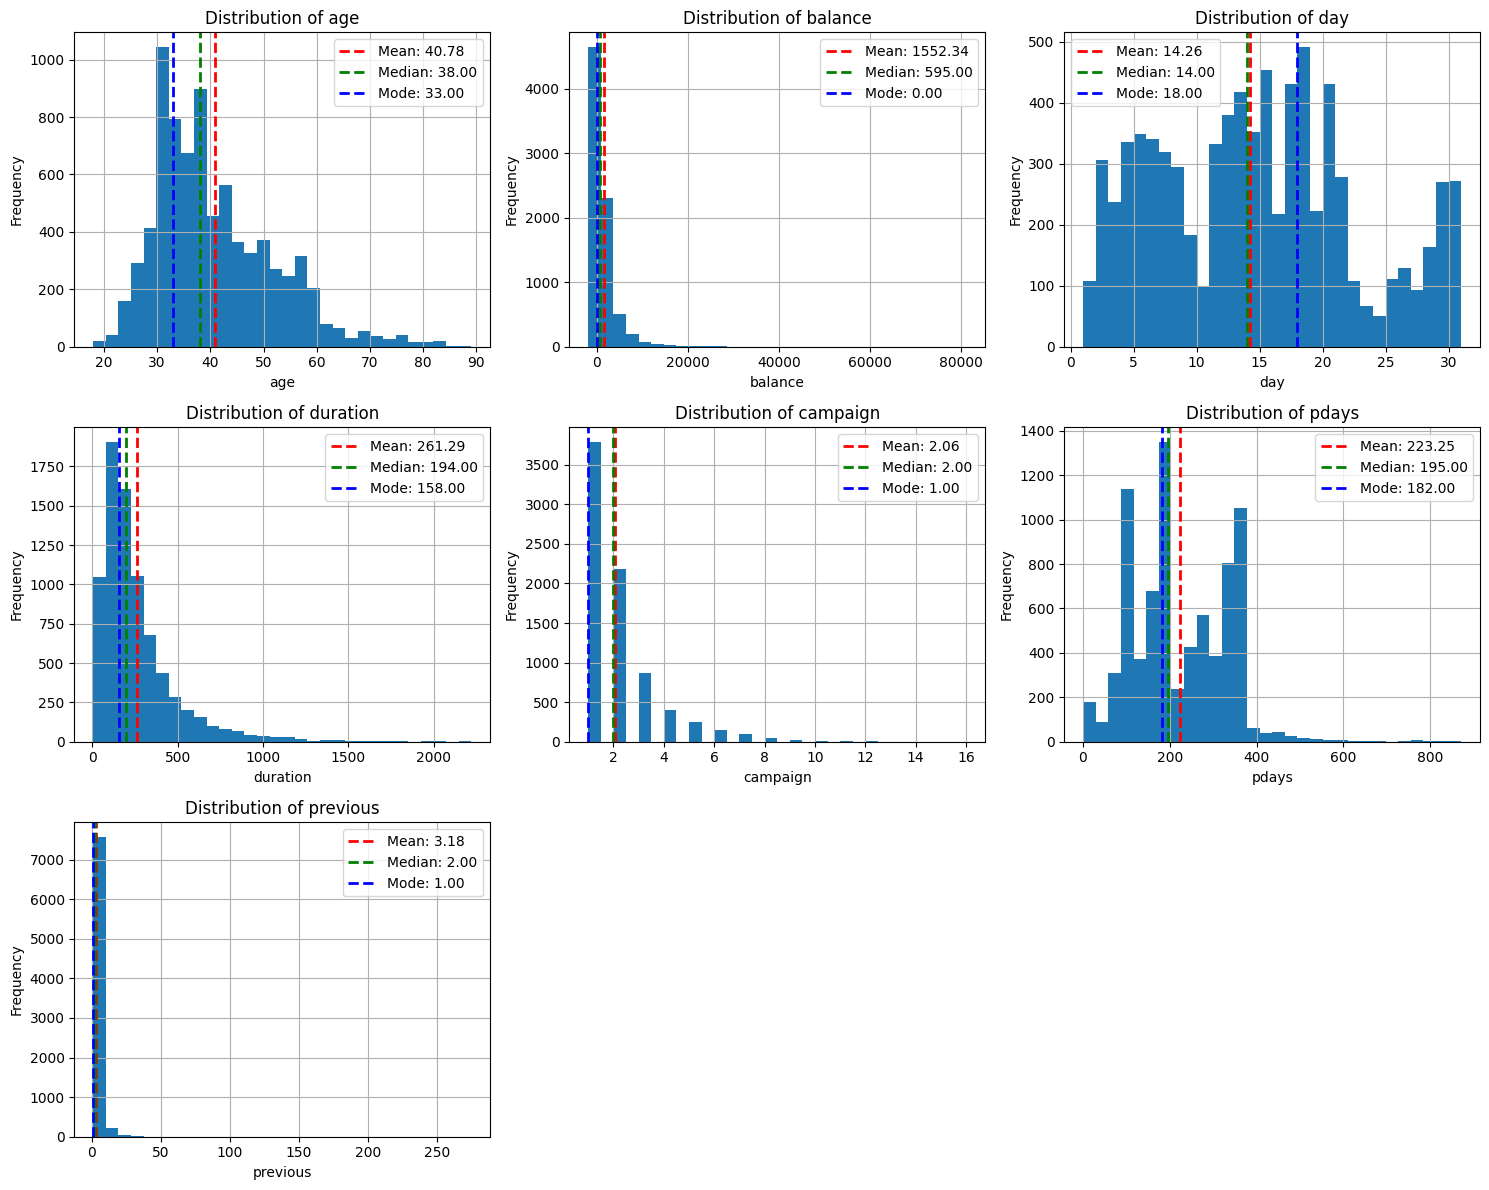

In [ ]:
numerical_cols = df_full.select_dtypes(include=np.number).columns # Pilih semua kolom angka.
n_cols = len(numerical_cols) # Hitung jumlah kolom.
n_plots_per_row = 3 # Tentukan 3 plot per baris.

n_rows = math.ceil(n_cols / n_plots_per_row) # Hitung jumlah baris plot.
fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4)) # Buat grid plot.
axes = axes.flatten() # Ratakan axes untuk iterasi.

for i, col in enumerate(numerical_cols): # Loop setiap kolom numerik.
    ax = axes[i]

    df_full[col].hist(bins=30, ax=ax) # Gambar Histogram (Distribusi Frekuensi).

    ax.set_title(f'Distribution of {col}') # Beri judul plot.
    ax.set_xlabel(col) # Label sumbu X.
    ax.set_ylabel('Frequency') # Label sumbu Y.

    mean_val = df_full[col].mean() # Hitung Mean (Rata-rata).
    median_val = df_full[col].median() # Hitung Median (Nilai tengah).
    mode_val = df_full[col].mode()[0] # Hitung Mode (Nilai paling sering).

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}') # Garis Mean.
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}') # Garis Median.
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}') # Garis Mode.

    ax.legend() # Tampilkan legenda garis statistik.

for i in range(n_cols, len(axes)): # Sembunyikan plot yang kosong.
    axes[i].set_visible(False)

plt.tight_layout() # Rapikan tata letak plot.
plt.show() # Tampilkan semua Histogram.

In [ ]:
from sklearn.preprocessing import LabelEncoder # Impor library Label Encoder

categorical_cols = df_full.select_dtypes(include=['object']).columns # Pilih semua kolom bertipe teks/object
label_encoder = LabelEncoder() # Inisiasi Encoder

for col in categorical_cols: # Loop setiap kolom teks
    # Konversi teks ke angka: Terapkan Label Encoding (e.g., 'a'->0, 'b'->1)
    df_full[col] = label_encoder.fit_transform(df_full[col])

In [ ]:
df_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1


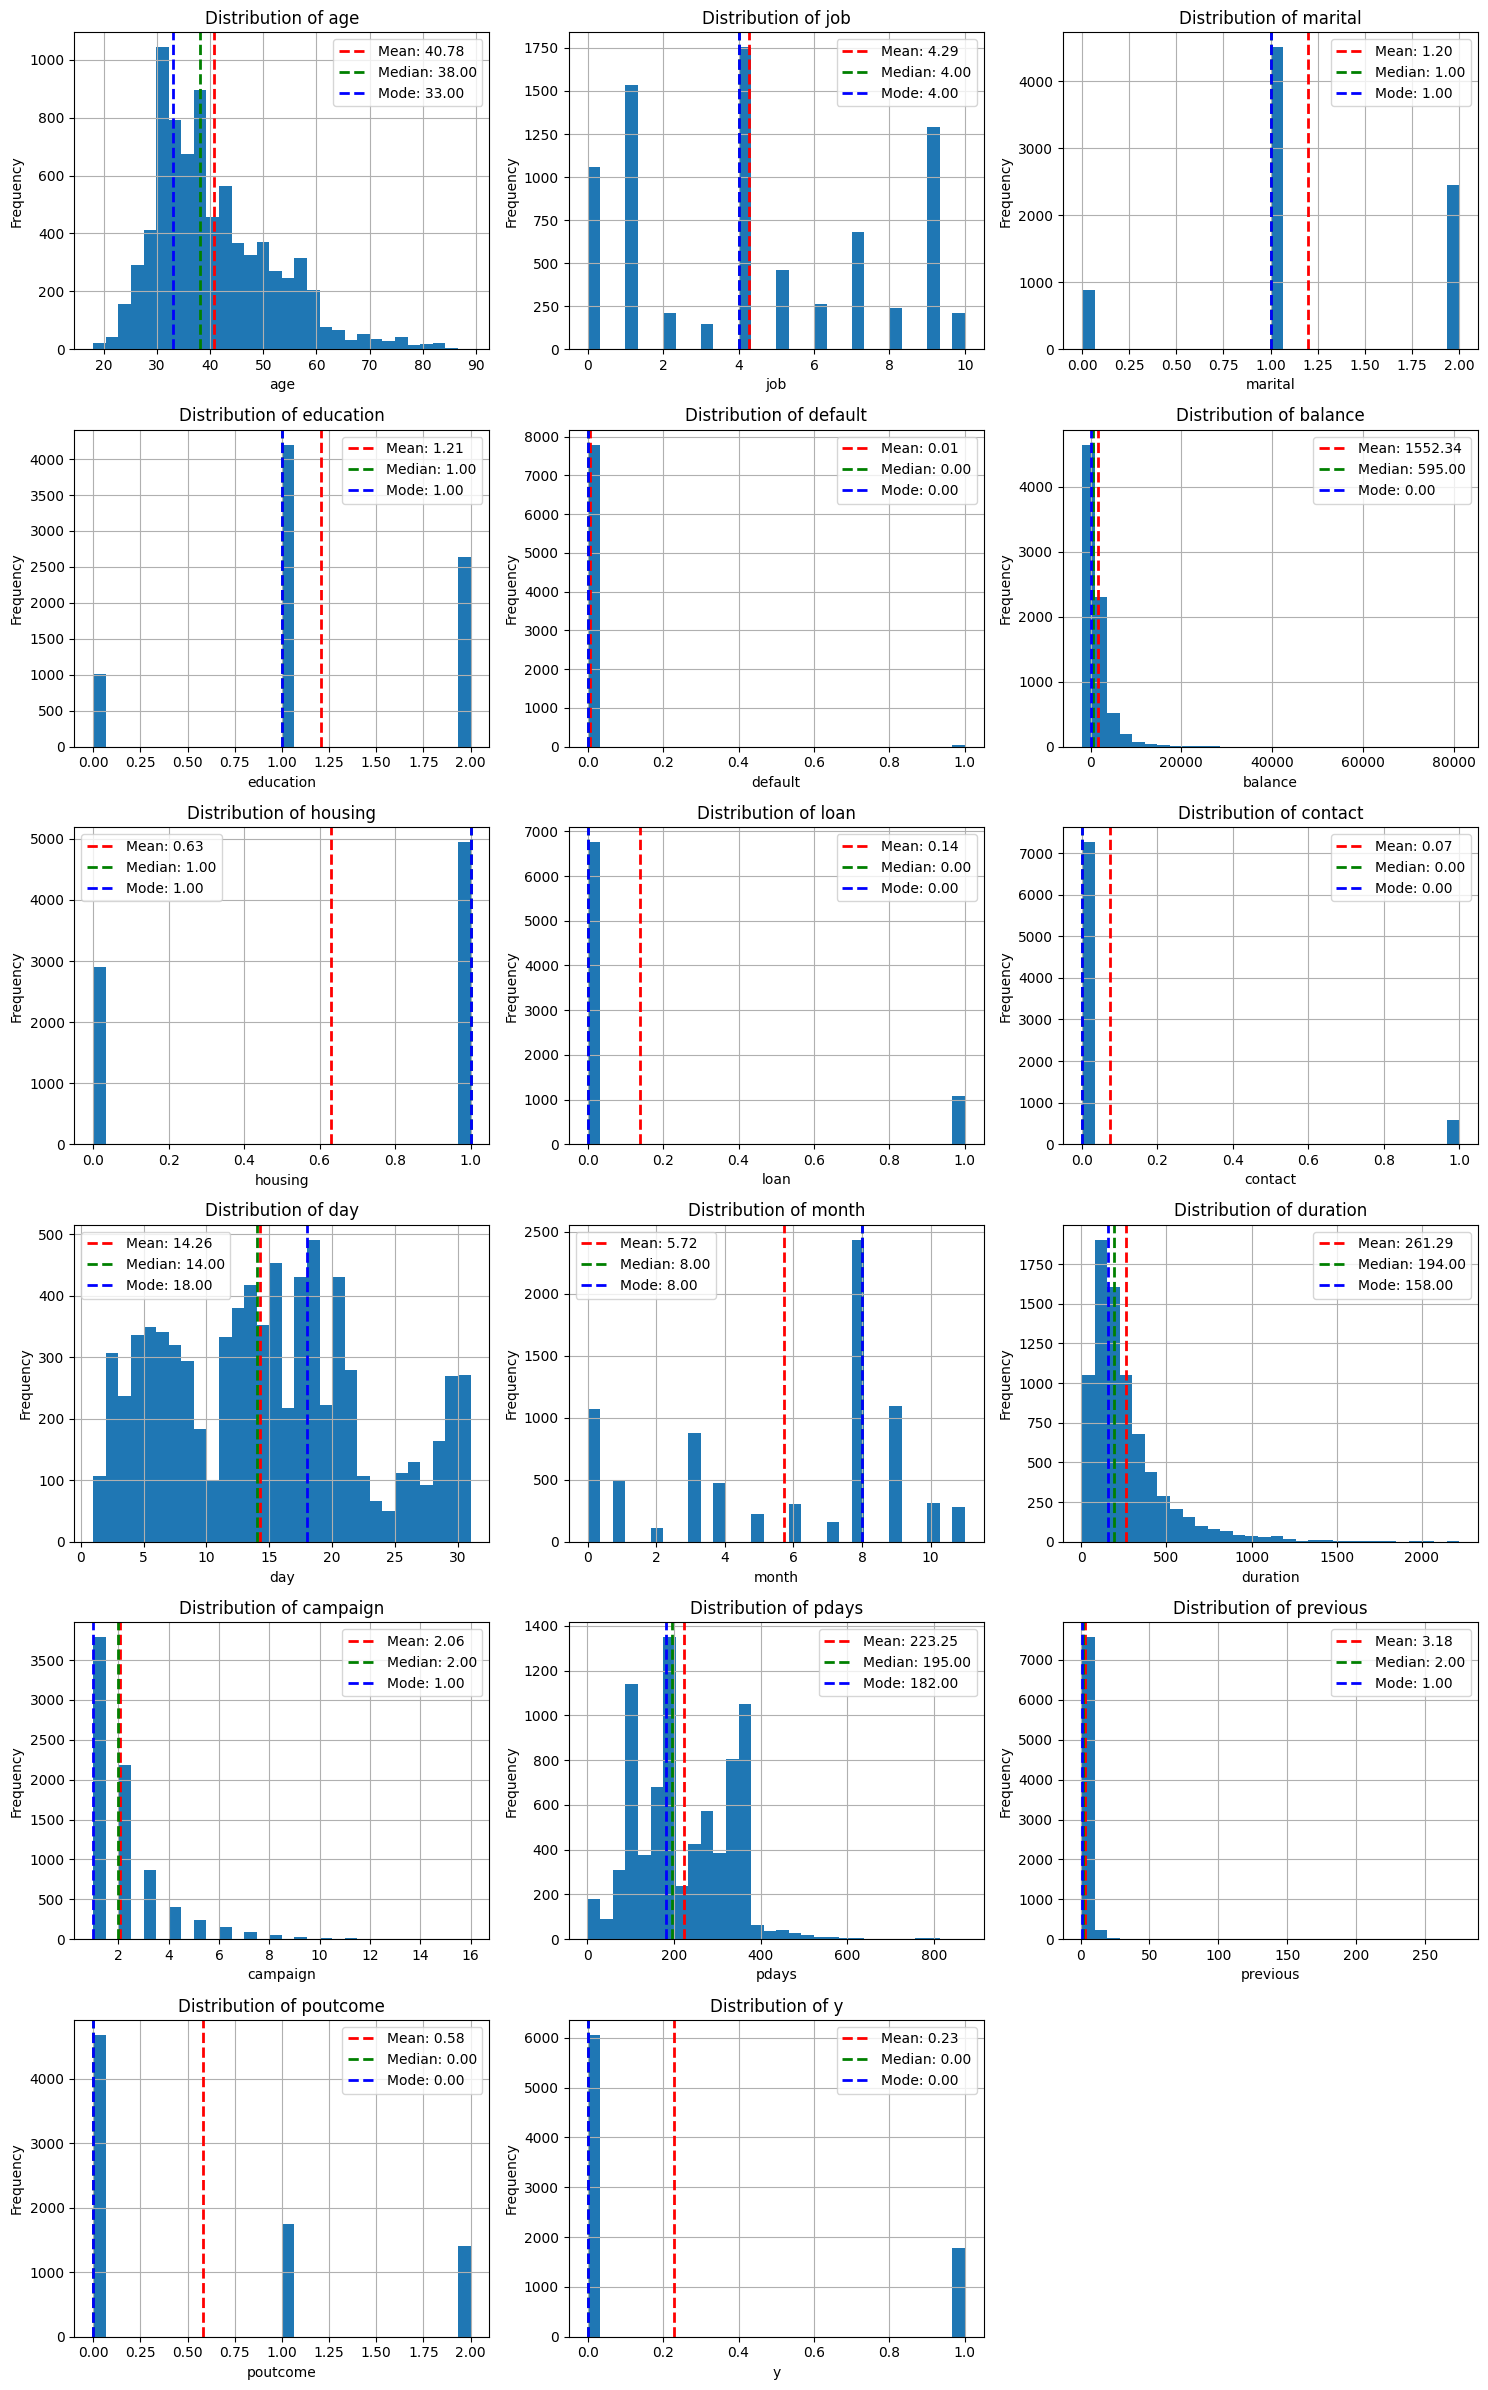

In [ ]:
# Dipakai kembali setelah di label encoding

numerical_cols = df_full.select_dtypes(include=np.number).columns # Pilih semua kolom angka.
n_cols = len(numerical_cols) # Hitung jumlah kolom.
n_plots_per_row = 3 # Tentukan 3 plot per baris.

n_rows = math.ceil(n_cols / n_plots_per_row) # Hitung jumlah baris plot.
fig, axes = plt.subplots(n_rows, n_plots_per_row, figsize=(15, n_rows * 4)) # Buat grid plot.
axes = axes.flatten() # Ratakan axes untuk iterasi.

for i, col in enumerate(numerical_cols): # Loop setiap kolom numerik.
    ax = axes[i]

    df_full[col].hist(bins=30, ax=ax) # Gambar Histogram (Distribusi Frekuensi).

    ax.set_title(f'Distribution of {col}') # Beri judul plot.
    ax.set_xlabel(col) # Label sumbu X.
    ax.set_ylabel('Frequency') # Label sumbu Y.

    mean_val = df_full[col].mean() # Hitung Mean (Rata-rata).
    median_val = df_full[col].median() # Hitung Median (Nilai tengah).
    mode_val = df_full[col].mode()[0] # Hitung Mode (Nilai paling sering).

    ax.axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}') # Garis Mean.
    ax.axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}') # Garis Median.
    ax.axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}') # Garis Mode.

    ax.legend() # Tampilkan legenda garis statistik.

for i in range(n_cols, len(axes)): # Sembunyikan plot yang kosong.
    axes[i].set_visible(False)

plt.tight_layout() # Rapikan tata letak plot.
plt.show() # Tampilkan semua Histogram.

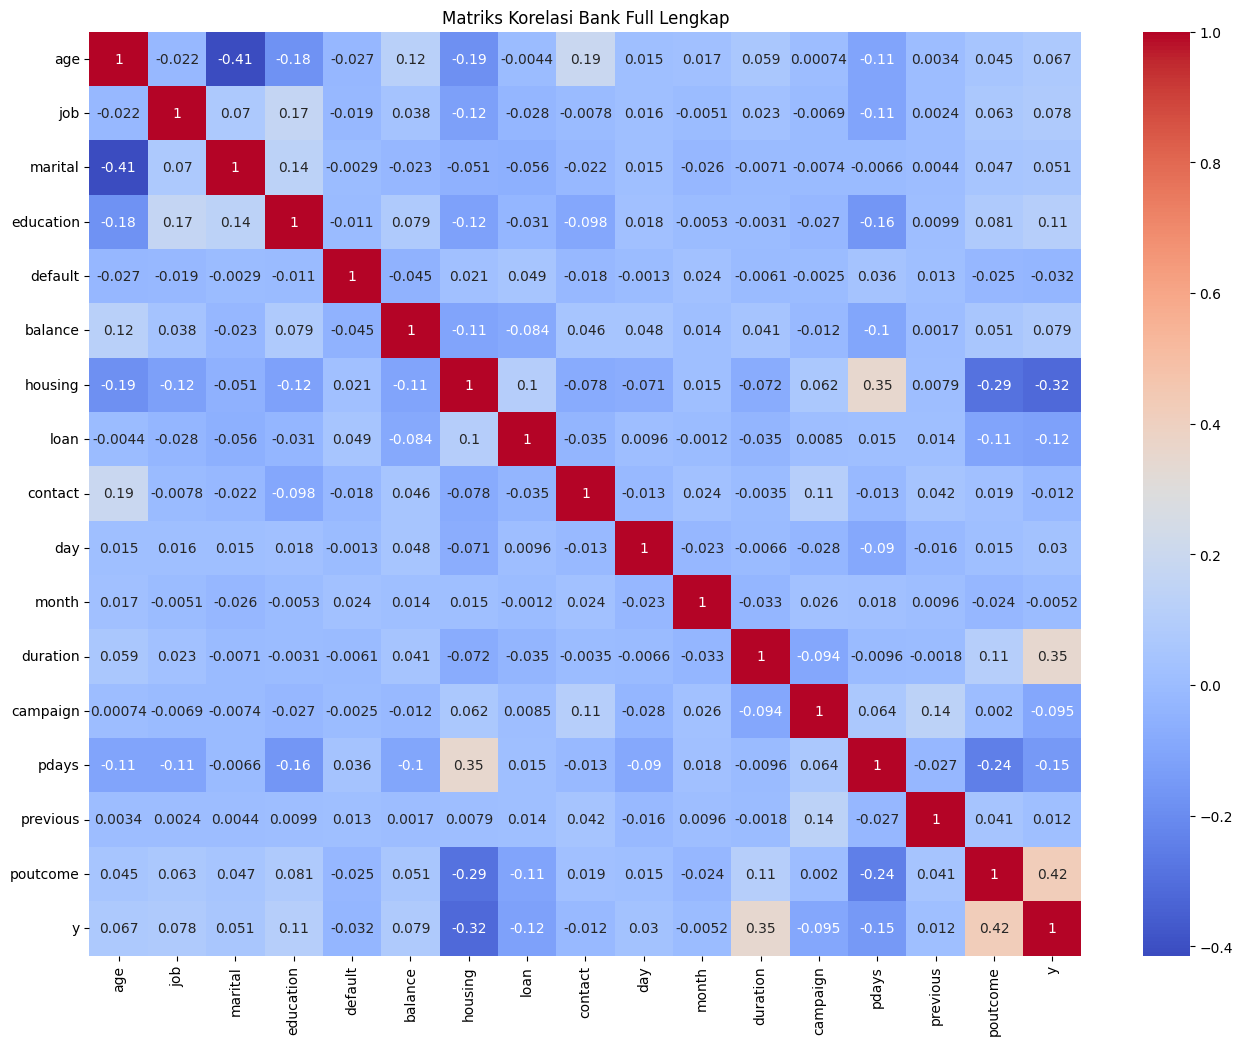

In [ ]:
import seaborn as sns # Import untuk visualisasi (Heatmap)
import matplotlib.pyplot as plt # Import plotting dasar

correlation_matrix = df_full.corr() # Hitung korelasi antar SEMUA kolom

plt.figure(figsize=(16, 12)) # Tentukan ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') # Gambar heatmap korelasi (dengan nilai numerik)
plt.title('Matriks Korelasi Bank Full Lengkap') # Beri judul
plt.show() # Tampilkan plot

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        7842 non-null   int64
 1   job        7842 non-null   int64
 2   marital    7842 non-null   int64
 3   education  7842 non-null   int64
 4   default    7842 non-null   int64
 5   balance    7842 non-null   int64
 6   housing    7842 non-null   int64
 7   loan       7842 non-null   int64
 8   contact    7842 non-null   int64
 9   day        7842 non-null   int64
 10  month      7842 non-null   int64
 11  duration   7842 non-null   int64
 12  campaign   7842 non-null   int64
 13  pdays      7842 non-null   int64
 14  previous   7842 non-null   int64
 15  poutcome   7842 non-null   int64
 16  y          7842 non-null   int64
dtypes: int64(17)
memory usage: 1.1 MB


# **6. Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_full.drop(columns=['y'], axis = 1) # X: Semua fitur
y = df_full['y'] # y: Kolom target

# Pembagian data dengan menjaga RASIO KETIDAKSEIMBANGAN kelas ('stratify=y')
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # JANGAN LUPA ini untuk data imbalanced!
)
print("Pembagian data selesai dengan Stratified Sampling.")

Pembagian data selesai dengan Stratified Sampling.


In [ ]:
print("Distribusi Kelas Target 'y':")
print(df_full['y'].value_counts())

print("\nPersentase Distribusi:")
print(df_full['y'].value_counts(normalize=True) * 100)

Distribusi Kelas Target 'y':
y
0    6056
1    1786
Name: count, dtype: int64

Persentase Distribusi:
y
0    77.225198
1    22.774802
Name: proportion, dtype: float64


## **6.1 Resampling Data (Mengurangi Mayoritas "No")**
*TIDAK DISARANKAN. Jumlah data terlalu sedikit, meningkatkan risiko overfitting (model terlalu hafal pada data training)*

### 6.1.1 Random Undersampling ❌

### 6.1.2 Nearmiss Undersampling ❌

### 6.1.3 Tomek Links ❌

### 6.1.4 ENN Rule ❌

### 6.1.5 Neighborhood Cleaning Rul ❌

## **6.2 Resampling Data (Menambahkan Minoritas "Yes")**
*SANGAT DISARANKAN. Ini memberikan data yang lebih substansial untuk dilatih model, mengurangi risiko kehilangan informasi, dan membantu model mempelajari pola kelas minoritas dengan lebih baik.*

### 6.2.1 Random Oversampling ✅



In [ ]:
# import the Random Over Sampler object.
from imblearn.over_sampling import RandomOverSampler # Import alat untuk oversampling.

# create the object.
over_sampler = RandomOverSampler() # Inisiasi objek over-sampler.

# fit the object to the training data.
x_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train) # Duplikasi sampel 'Yes' pada data training.

In [ ]:
# Cek Distribusi
print(pd.Series(y_train_over).value_counts()) # Tampilkan jumlah baris baru per kelas (seharusnya seimbang).

y
0    4844
1    4844
Name: count, dtype: int64


In [ ]:
# Standard Scalling
sc = StandardScaler() # Inisiasi objek scaler.
x_train_over = sc.fit_transform(x_train_over) # Fit scaler ke data training oversampled, lalu transform.
x_test_over = sc.transform(X_test) # Transform data testing ASLI (dengan scaler dari training), lalu simpan sebagai x_test_over.

In [ ]:
# Pelatihan Random Forest (Quick Check)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10) # Inisiasi model Random Forest dengan parameter.
model_rf.fit(x_train_over, y_train_over) # Melatih model menggunakan data training yang sudah di-oversample.

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediksi Random Forest (Quick Check)
y_pred = model_rf.predict(x_test_over) # Gunakan model yang sudah dilatih untuk memprediksi hasil di data testing.

In [ ]:
# Pelatihan Semua Model (Massal)
# --- Definisikan Model yang Akan Diuji ---

# Daftar nama model yang akan ditampilkan (untuk output).
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC", # Dikomentari (tidak digunakan).
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

# Daftar objek model (dengan parameter awal).
classifiers = [
    LogisticRegression(max_iter=1000), # Model Linear (baseline).
    KNeighborsClassifier(), # Model berbasis jarak.
    LinearSVC(max_iter=10000), # Model Support Vector Machine (Linear).
    SVC(kernel='rbf', probability=True, random_state=42), # Model SVM (Non-Linear).
    # NuSVC(probability=True), # Dikomentari (tidak digunakan).
    GaussianNB(), # Model probabilistik sederhana.
    RandomForestClassifier(), # Model Ensemble (Bagging).
    AdaBoostClassifier(), # Model Ensemble (Boosting).
    GradientBoostingClassifier(), # Model Ensemble (Boosting, kuat).
    DecisionTreeClassifier() # Model Pohon Keputusan (terkadang dijadikan baseline).
]

# --- Proses Training Massal ---

for name, clf in zip(names, classifiers): # Loop untuk setiap pasangan nama dan objek model.
    print(f"Training {name}...") # Tampilkan nama model yang sedang dilatih.
    clf.fit(x_train_over, y_train_over) # Latih model menggunakan data training yang sudah di-oversample.

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Evaluasi Semua Model (Massal)
# --- Proses Evaluasi Massal ---

for name, clf in zip(names, classifiers): # Loop lagi untuk mengevaluasi setiap model.
    print(f"Evaluating {name}...") # Tampilkan nama model yang dievaluasi.
    y_pred = clf.predict(x_test_over) # Model digunakan untuk memprediksi data testing.
    print(classification_report(y_test, y_pred)) # Tampilkan metrik performa (Classification Report).
    print("\n") # Baris kosong untuk pemisah.

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1212
           1       0.52      0.79      0.63       357

    accuracy                           0.79      1569
   macro avg       0.72      0.79      0.74      1569
weighted avg       0.84      0.79      0.80      1569



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1212
           1       0.49      0.70      0.58       357

    accuracy                           0.77      1569
   macro avg       0.69      0.74      0.71      1569
weighted avg       0.81      0.77      0.78      1569



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1212
           1       0.52      0.79      0.63       357

    accuracy                           0.79      1569
   macro avg       0.72      0.

In [ ]:
# Metrik Evaluasi Final

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve # Import semua metrik evaluasi yang dibutuhkan.

# Precision
precision = precision_score(y_test, y_pred) # Hitung metrik Precision.
print(f'Precision: {precision:.4f}') # Tampilkan hasil Precision (penting untuk False Positive).

# Recall
recall = recall_score(y_test, y_pred) # Hitung metrik Recall.
print(f'Recall: {recall:.4f}') # Tampilkan hasil Recall (penting untuk True Positive/identifikasi 'Yes').

# F1-Score
f1 = f1_score(y_test, y_pred) # Hitung metrik F1-Score (keseimbangan Precision & Recall).
print(f'F1-Score: {f1:.4f}') # Tampilkan hasil F1-Score.

#
# Classification Report Lengkap
print("\nClassification Report:") # Tampilkan judul laporan lengkap.
print(classification_report(y_test, y_pred)) # Tampilkan metrik lengkap untuk kelas '0' dan '1'.

Precision: 0.5273
Recall: 0.5406
F1-Score: 0.5339

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1212
           1       0.53      0.54      0.53       357

    accuracy                           0.79      1569
   macro avg       0.70      0.70      0.70      1569
weighted avg       0.79      0.79      0.79      1569



In [ ]:
import joblib
import os
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score
import time

# --- PARAMETER TERBAIK DARI TUNING ---
BEST_N_ESTIMATORS = 98
BEST_MAX_DEPTH = 5
BEST_LEARNING_RATE = 0.1

# ASUMSI: x_train_over, y_train_over, x_test_over, dan y_test sudah tersedia

print("=====================================================")
print("▶️ FINAL MODEL: PELATIHAN DAN PENYIMPANAN (GRADIENT BOOSTING)")
print("=====================================================")

# 1. Inisialisasi model dengan parameter TERBAIK
model_gb_final_winner = GradientBoostingClassifier(
    n_estimators=BEST_N_ESTIMATORS,
    max_depth=5,
    learning_rate=BEST_LEARNING_RATE,
    random_state=42
)

# 2. Pelatihan model
try:
    start_time = time.time()
    model_gb_final_winner.fit(x_train_over, y_train_over)
    end_time = time.time()
    print(f"✅ Pelatihan Selesai dalam {end_time - start_time:.2f} detik.")

except NameError:
    print("\n❌ ERROR KRUSIAL: Data training tidak ditemukan. Mohon jalankan semua cell data preparation.")
    raise

# 3. Evaluasi Verifikasi Final
try:
    y_pred_final = model_gb_final_winner.predict(x_test_over)

    print("\n=== CLASSIFICATION REPORT MODEL GRADIENT BOOSTING FINAL ===")
    print(classification_report(y_test, y_pred_final))

    f1_final_actual = f1_score(y_test, y_pred_final, pos_label=1)
    print(f"\n✅ F1-SCORE KELAS 1 FINAL: {f1_final_actual:.4f}")

except NameError:
    print("\n❌ Gagal Verifikasi. Pastikan variabel uji tersedia.")

# 4. Penyimpanan Model ke File .h5
# Menggunakan F1-Score 0.68 dalam nama file
filename_h5 = 'best_gradient_boosting_final_bank_full.h5'
output_dir = 'model_deployment_h5'
full_path_h5 = os.path.join(output_dir, filename_h5)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    joblib.dump(model_gb_final_winner, full_path_h5)
    print(f"\n🎉 SUKSES! FILE MODEL DISIMPAN SEBAGAI: {filename_h5}")

except Exception as e:
    print(f"\n❌ ERROR SAAT MENYIMPAN: {e}")

▶️ FINAL MODEL: PELATIHAN DAN PENYIMPANAN (GRADIENT BOOSTING)
✅ Pelatihan Selesai dalam 2.89 detik.

=== CLASSIFICATION REPORT MODEL GRADIENT BOOSTING FINAL ===
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1212
           1       0.58      0.82      0.68       357

    accuracy                           0.82      1569
   macro avg       0.76      0.82      0.78      1569
weighted avg       0.86      0.82      0.83      1569


✅ F1-SCORE KELAS 1 FINAL: 0.6790

🎉 SUKSES! FILE MODEL DISIMPAN SEBAGAI: best_gradient_boosting_final_bank_full.h5


In [ ]:
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
import time

# --- PARAMETER TERBAIK UNTUK RANDOM FOREST (Runner-Up) ---
RF_N_ESTIMATORS = 200 # Meningkatkan jumlah pohon dari default 100
RF_MAX_DEPTH = 10     # Membatasi kedalaman untuk mencegah overfitting pada data ROS
RF_LEARNING_RATE = 0.1 # Tidak digunakan di RF, tapi tetap ditaruh
RANDOM_STATE = 42

# ASUMSI: x_train_over, y_train_over, x_test_over, dan y_test sudah tersedia di memori

print("=====================================================")
print("▶️ FINAL MODEL: PELATIHAN DAN PENYIMPANAN (RANDOM FOREST)")
print("=====================================================")

# 1. Inisialisasi model Random Forest dengan parameter terbaik
model_rf_final = RandomForestClassifier(
    n_estimators=RF_N_ESTIMATORS,
    max_depth=RF_MAX_DEPTH,
    random_state=RANDOM_STATE,
    n_jobs=-1 # Menggunakan semua core untuk mempercepat training
)

# 2. Pelatihan model
try:
    start_time = time.time()
    # Melatih model menggunakan data ROS yang sudah di-scale
    model_rf_final.fit(x_train_over, y_train_over)
    end_time = time.time()
    print(f"✅ Pelatihan Random Forest Selesai dalam {end_time - start_time:.2f} detik.")

except NameError:
    print("\n❌ ERROR KRUSIAL: Data training (x_train_over) tidak ditemukan. Mohon jalankan semua cell data preparation.")
    raise

# 3. Evaluasi Verifikasi Final
try:
    y_pred_final = model_rf_final.predict(x_test_over)

    print("\n=== CLASSIFICATION REPORT RANDOM FOREST FINAL ===")
    print(classification_report(y_test, y_pred_final))

    f1_final_actual = f1_score(y_test, y_pred_final, pos_label=1)
    print(f"\n✅ F1-SCORE KELAS 1 FINAL: {f1_final_actual:.4f} (Angka Runner-Up Anda)")

except NameError:
    print("\n❌ Gagal Verifikasi. Pastikan variabel uji tersedia.")

# 4. Penyimpanan Model ke File .h5
# Menggunakan F1-Score 0.66/0.67 dalam nama file
filename_h5 = 'best_random_forest_final_bank_full.h5'
output_dir = 'model_deployment_h5'
full_path_h5 = os.path.join(output_dir, filename_h5)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    joblib.dump(model_rf_final, full_path_h5)
    print(f"\n🎉 SUKSES! FILE RANDOM FOREST DISIMPAN SEBAGAI: {filename_h5}")

except Exception as e:
    print(f"\n❌ ERROR SAAT MENYIMPAN: {e}")

▶️ FINAL MODEL: PELATIHAN DAN PENYIMPANAN (RANDOM FOREST)
✅ Pelatihan Random Forest Selesai dalam 1.78 detik.

=== CLASSIFICATION REPORT RANDOM FOREST FINAL ===
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1212
           1       0.58      0.83      0.69       357

    accuracy                           0.83      1569
   macro avg       0.76      0.83      0.78      1569
weighted avg       0.86      0.83      0.84      1569


✅ F1-SCORE KELAS 1 FINAL: 0.6866 (Angka Runner-Up Anda)

🎉 SUKSES! FILE RANDOM FOREST DISIMPAN SEBAGAI: best_random_forest_final_bank_full.h5


### 6.2.2 SMOTE (Synthetic Minority Oversampling Technique) ✅

In [ ]:
from imblearn.over_sampling import SMOTE # Import alat SMOTE untuk oversampling.

# create the object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority') # Inisiasi objek SMOTE (hanya targetkan kelas minoritas 'Yes').

# fit the object to our training data
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) # Ciptakan data sintetis baru, hasilkan data training seimbang (50:50).

In [ ]:
# Cek Distribusi
print(pd.Series(y_train_smote).value_counts()) # Tampilkan jumlah baris per kelas (harus sudah seimbang, misal 6056 vs 6056).

y
0    4844
1    4844
Name: count, dtype: int64


In [ ]:
# Standard Scalling
from sklearn.preprocessing import StandardScaler # Import objek StandardScaler.
import pandas as pd # Import Pandas (Untuk manipulasi data, meski sudah diimpor di atas).

sc = StandardScaler() # Inisiasi objek scaler.

x_train_smote = sc.fit_transform(x_train_smote) # Fit scaler ke data training SMOTE, lalu transform.
x_test_smote = sc.transform(X_test) # Transform data testing ASLI (pakai scaler dari training SMOTE), simpan sebagai x_test_smote.

In [ ]:
# Pelatihan Random Forest (Quick Check)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10) # Inisiasi model Random Forest (dengan 100 pohon, kedalaman max 10).
model_rf.fit(x_train_smote, y_train_smote) # Latih model menggunakan data training hasil SMOTE.

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediksi Random Forest (Quick Check)
y_pred = model_rf.predict(x_test_smote) # Gunakan model Random Forest yang sudah dilatih untuk memprediksi hasil di data testing.

In [ ]:
# Pelatihan Semua Model (Massal)
# --- Definisikan Model yang Akan Diuji ---

# Daftar nama model yang akan ditampilkan (untuk output).
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

# Daftar objek model (algoritma klasifikasi) dengan parameter awal.
classifiers = [
    LogisticRegression(max_iter=1000), # Model Linear (Baseline).
    KNeighborsClassifier(), # Model berbasis jarak.
    LinearSVC(max_iter=10000), # Model SVM (Linear).
    SVC(kernel='rbf', probability=True, random_state=42), # Model SVM (Non-Linear).
    NuSVC(probability=True), # Model NuSVC (Versi lain dari SVM).
    GaussianNB(), # Model Probabilistik.
    RandomForestClassifier(), # Model Ensemble (Bagging).
    AdaBoostClassifier(), # Model Ensemble (Boosting).
    GradientBoostingClassifier(), # Model Ensemble (Boosting, kuat).
    DecisionTreeClassifier() # Model Pohon Keputusan.
]

# --- Proses Training Massal ---

for name, clf in zip(names, classifiers): # Loop untuk setiap pasangan nama dan objek model.
    print(f"Training {name}...") # Tampilkan nama model yang sedang dilatih.
    clf.fit(x_train_smote, y_train_smote) # Latih model menggunakan data training hasil SMOTE.

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training NuSVC...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Evaluasi Semua Model (Massal)
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers): # Loop untuk mengevaluasi setiap model.
    print(f"Evaluating {name}...") # Tampilkan nama model yang dievaluasi.
    y_pred = clf.predict(x_test_smote) # Model digunakan untuk memprediksi data testing.

    print(classification_report(y_test, y_pred)) # Tampilkan Classification Report (metrik lengkap).
    print("\n") # Baris kosong untuk pemisah.

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1212
           1       0.50      0.71      0.58       357

    accuracy                           0.77      1569
   macro avg       0.70      0.75      0.71      1569
weighted avg       0.81      0.77      0.78      1569



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      1212
           1       0.50      0.69      0.58       357

    accuracy                           0.77      1569
   macro avg       0.70      0.74      0.71      1569
weighted avg       0.81      0.77      0.78      1569



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1212
           1       0.49      0.72      0.58       357

    accuracy                           0.77      1569
   macro avg       0.70      0.

In [ ]:
# Metrik Evaluasi Final

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve # Import semua metrik evaluasi yang dibutuhkan.

# Precision
precision = precision_score(y_test, y_pred) # Hitung metrik Precision.
print(f'Precision: {precision:.4f}') # Tampilkan hasil Precision (seberapa akurat prediksi 'Yes').

# Recall
recall = recall_score(y_test, y_pred) # Hitung metrik Recall.
print(f'Recall: {recall:.4f}') # Tampilkan hasil Recall (seberapa banyak 'Yes' yang berhasil ditemukan).

# F1-Score
f1 = f1_score(y_test, y_pred) # Hitung metrik F1-Score.
print(f'F1-Score: {f1:.4f}') # Tampilkan hasil F1-Score (keseimbangan Precision & Recall).

# Classification Report Lengkap
print("\nClassification Report:") # Tampilkan judul laporan lengkap.
print(classification_report(y_test, y_pred)) # Tampilkan metrik lengkap untuk model terakhir.

Precision: 0.4816
Recall: 0.6218
F1-Score: 0.5428

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1212
           1       0.48      0.62      0.54       357

    accuracy                           0.76      1569
   macro avg       0.68      0.71      0.69      1569
weighted avg       0.79      0.76      0.77      1569



### 6.2.3 ADASYN ✅

In [ ]:
# import the ADASYN object.
from imblearn.over_sampling import ADASYN # Import alat ADASYN untuk oversampling cerdas.

# create the object to resample the majority class.
adasyn = ADASYN(sampling_strategy="minority") # Inisiasi objek ADASYN (targetkan kelas minoritas).

# fit the object to the training data.
x_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train) # Ciptakan data sintetis baru, hasilkan data training yang seimbang.

In [ ]:
# Cek Distribusi
print(pd.Series(y_train_adasyn).value_counts()) # Tampilkan jumlah baris per kelas (harus mendekati seimbang).

y
0    4844
1    4716
Name: count, dtype: int64


In [ ]:
# Standard Scalling
sc = StandardScaler() # Inisiasi objek scaler.
x_train_adasyn = sc.fit_transform(x_train_adasyn) # Fit scaler ke data training ADASYN, lalu transform.
x_test_adasyn = sc.transform(X_test) # Transform data testing ASLI (pakai scaler dari training ADASYN).

In [ ]:
# Pelatihan Random Forest (Quick Check)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10) # Inisiasi model Random Forest.
model_rf.fit(x_train_adasyn, y_train_adasyn) # Latih model menggunakan data training hasil ADASYN.

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediksi Random Forest (Quick Check)
y_pred = model_rf.predict(x_test_adasyn) # Gunakan model Random Forest yang sudah dilatih untuk memprediksi hasil di data testing.

In [ ]:
# Pelatihan Semua Model (Massal)
# --- Definisikan Model yang Akan Diuji ---

# Daftar nama model yang akan ditampilkan (untuk output).
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC", # Dikomentari (tidak digunakan).
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

# Daftar objek model (algoritma klasifikasi) dengan parameter awal.
classifiers = [
    LogisticRegression(max_iter=1000), # Model Linear (Baseline).
    KNeighborsClassifier(), # Model berbasis jarak.
    LinearSVC(max_iter=10000), # Model SVM (Linear).
    SVC(kernel='rbf', probability=True, random_state=42), # Model SVM (Non-Linear).
    # NuSVC(probability=True), # Dikomentari (tidak digunakan).
    GaussianNB(), # Model Probabilistik.
    RandomForestClassifier(), # Model Ensemble (Bagging).
    AdaBoostClassifier(), # Model Ensemble (Boosting).
    GradientBoostingClassifier(), # Model Ensemble (Boosting, kuat).
    DecisionTreeClassifier() # Model Pohon Keputusan.
]

# --- Proses Training Massal ---

for name, clf in zip(names, classifiers): # Loop untuk setiap pasangan nama dan objek model.
    print(f"Training {name}...") # Tampilkan nama model yang sedang dilatih.
    clf.fit(x_train_adasyn, y_train_adasyn) # Latih model menggunakan data training hasil ADASYN.

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Evaluasi Semua Model (Massal)
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers): # Loop untuk mengevaluasi setiap model.
    print(f"Evaluating {name}...") # Tampilkan nama model yang dievaluasi.
    y_pred = clf.predict(x_test_adasyn) # Model digunakan untuk memprediksi data testing.

    print(classification_report(y_test, y_pred)) # Tampilkan Classification Report (metrik lengkap).
    print("\n") # Baris kosong untuk pemisah.

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1212
           1       0.49      0.72      0.58       357

    accuracy                           0.77      1569
   macro avg       0.70      0.75      0.71      1569
weighted avg       0.81      0.77      0.78      1569



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1212
           1       0.49      0.68      0.57       357

    accuracy                           0.76      1569
   macro avg       0.69      0.74      0.70      1569
weighted avg       0.80      0.76      0.78      1569



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1212
           1       0.48      0.71      0.57       357

    accuracy                           0.76      1569
   macro avg       0.69      0.

In [ ]:
# Metrik Evaluasi Final
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve # Import semua metrik evaluasi yang dibutuhkan.

# Precision
precision = precision_score(y_test, y_pred) # Hitung metrik Precision.
print(f'Precision: {precision:.4f}') # Tampilkan hasil Precision (seberapa akurat prediksi 'Yes').

# Recall
recall = recall_score(y_test, y_pred) # Hitung metrik Recall.
print(f'Recall: {recall:.4f}') # Tampilkan hasil Recall (seberapa banyak 'Yes' yang berhasil ditemukan).

# F1-Score
f1 = f1_score(y_test, y_pred) # Hitung metrik F1-Score.
print(f'F1-Score: {f1:.4f}') # Tampilkan hasil F1-Score (keseimbangan Precision & Recall).

#
# Classification Report Lengkap
print("\nClassification Report:") # Tampilkan judul laporan lengkap.
print(classification_report(y_test, y_pred)) # Tampilkan metrik lengkap untuk model terakhir.

Precision: 0.4701
Recall: 0.6162
F1-Score: 0.5333

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.83      1212
           1       0.47      0.62      0.53       357

    accuracy                           0.75      1569
   macro avg       0.67      0.71      0.68      1569
weighted avg       0.78      0.75      0.77      1569



## **6.3 Hybrid (Kombinasi)**
*SANGAT DISARANKAN. Teknik terbaik untuk stabilitas dan akurasi yang lebih tinggi.*

### 6.3.1 SMOTE & Tomek Links ✅

In [ ]:
# import the SMOTETomek.
from imblearn.combine import SMOTETomek

# create the  object with the desired sampling strategy.
smotemek = SMOTETomek(sampling_strategy='auto')

# fit the object to our training data.
x_train_smt, y_train_smt = smotemek.fit_resample(X_train, y_train)

In [ ]:
# Cek Distribusi
print(pd.Series(y_train_smt).value_counts())

y
0    4680
1    4680
Name: count, dtype: int64


In [ ]:
# Standard Scalling
sc = StandardScaler()
x_train_smt = sc.fit_transform(x_train_smt)
x_test_smt = sc.transform(X_test)

In [ ]:
# Pelatihan Random Forest (Quick Check)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_smt, y_train_smt)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediksi Random Forest (Quick Check)
y_pred = model_rf.predict(x_test_smt)

In [ ]:
# Pelatihan Semua Model (Massal)
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_smt, y_train_smt)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Evaluasi Semua Model (Massal)
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_smt)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1212
           1       0.50      0.73      0.59       357

    accuracy                           0.77      1569
   macro avg       0.70      0.76      0.72      1569
weighted avg       0.81      0.77      0.79      1569



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1212
           1       0.49      0.69      0.57       357

    accuracy                           0.77      1569
   macro avg       0.69      0.74      0.71      1569
weighted avg       0.80      0.77      0.78      1569



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1212
           1       0.49      0.73      0.58       357

    accuracy                           0.76      1569
   macro avg       0.70      0.

In [ ]:
# Metrik Evaluasi Final
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.5086
Recall: 0.6639
F1-Score: 0.5759

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1212
           1       0.51      0.66      0.58       357

    accuracy                           0.78      1569
   macro avg       0.70      0.74      0.71      1569
weighted avg       0.80      0.78      0.79      1569



### 6.3.2 SMOTE & ENN ✅

In [ ]:
# import the SMOTEENN.
from imblearn.combine import SMOTEENN

# create the  object with the desired samplig strategy.
smoenn = SMOTEENN(sampling_strategy='minority')

# fit the object to our training data.
x_train_smtenn, y_train_smtenn = smoenn.fit_resample(X_train, y_train)

In [ ]:
# Cek Distribusi
print(pd.Series(y_train_smtenn).value_counts())

y
1    3612
0    2924
Name: count, dtype: int64


In [ ]:
# Standard Scalling
sc = StandardScaler()
x_train_smtenn = sc.fit_transform(x_train_smtenn)
x_test_smtenn = sc.transform(X_test)

In [ ]:
# Pelatihan Random Forest (Quick Check)
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model_rf.fit(x_train_smtenn, y_train_smtenn)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Prediksi Random Forest (Quick Check)
y_pred = model_rf.predict(x_test_smtenn)

In [ ]:
# Pelatihan Semua Model (Massal)
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Linear SVC",
    "SVC (RBF)",
    # "NuSVC",
    "Gaussian Naive Bayes",
    "Random Forest",
    "AdaBoost",
    "Gradient Boosting",
    "DecisionTreeClassifier"
]

classifiers = [
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(),
    LinearSVC(max_iter=10000),
    SVC(kernel='rbf', probability=True, random_state=42),
    # NuSVC(probability=True),
    GaussianNB(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier()
]

for name, clf in zip(names, classifiers):
    print(f"Training {name}...")
    clf.fit(x_train_smtenn, y_train_smtenn)

Training Logistic Regression...
Training K-Nearest Neighbors...
Training Linear SVC...
Training SVC (RBF)...
Training Gaussian Naive Bayes...
Training Random Forest...
Training AdaBoost...
Training Gradient Boosting...
Training DecisionTreeClassifier...


In [ ]:
# Evaluasi Semua Model (Massal)# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
for name, clf in zip(names, classifiers):
    print(f"Evaluating {name}...")
    y_pred = clf.predict(x_test_smtenn)

    print(classification_report(y_test, y_pred))
    print("\n")

Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1212
           1       0.47      0.85      0.61       357

    accuracy                           0.75      1569
   macro avg       0.71      0.78      0.71      1569
weighted avg       0.83      0.75      0.77      1569



Evaluating K-Nearest Neighbors...
              precision    recall  f1-score   support

           0       0.91      0.75      0.83      1212
           1       0.47      0.75      0.58       357

    accuracy                           0.75      1569
   macro avg       0.69      0.75      0.70      1569
weighted avg       0.81      0.75      0.77      1569



Evaluating Linear SVC...
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1212
           1       0.47      0.84      0.61       357

    accuracy                           0.75      1569
   macro avg       0.71      0.

In [ ]:
# Metrik Evaluasi Final
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.4f}')

#

# Classification Report Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.4613
Recall: 0.8011
F1-Score: 0.5855

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      1212
           1       0.46      0.80      0.59       357

    accuracy                           0.74      1569
   macro avg       0.69      0.76      0.70      1569
weighted avg       0.82      0.74      0.76      1569



# **7. Modeling**
### 📊 Evaluasi Model Terbaik: Gradient Boosting (Random Oversampling)

| Metrik | Kelas 0 (Mayoritas) | **Kelas 1 (Minoritas)** | Rata-Rata Makro (Macro Avg) |
| :--- | :--- | :--- | :--- |
| **Precision** | 0.95 | **0.57** | 0.76 |
| **Recall** | 0.81 | **0.84** | 0.83 |
| **F1-Score** | 0.87 | **0.68** | 0.78 |
| **Support** | 1212 | 357 | 1569 |

**Akurasi Keseluruhan (Accuracy): 0.82**

***

**Kesimpulan:** Dengan F1-Score Kelas 1 sebesar **0.68**, model ini menunjukkan kinerja terbaik dalam menyeimbangkan identifikasi kasus minoritas (Recall tinggi 0.84) dengan keakuratan prediksi positif (Precision 0.57).

In [ ]:
import pickle
import os
from sklearn.ensemble import GradientBoostingClassifier

# --- MODEL INI HARUS DILATIH DI SINI, DI LUAR LOOP MASSAL ---
# Kita gunakan parameter yang sama seperti di loop (default)
model_gb_final = GradientBoostingClassifier(random_state=42)

# ASUMSI: X_train_over dan y_train_over adalah data ROS
print("▶️ Melatih Model Gradient Boosting untuk Disimpan (Final Save)...")
model_gb_final.fit(x_train_over, y_train_over)
print("✅ Pelatihan Selesai. Model siap disimpan.")

# ----------------------------------------------------------------------
# 2. Penyimpanan Model ke File .pkl (Gunakan variabel baru: model_gb_final)
# ----------------------------------------------------------------------
filename = 'best_gradient_boosting_ros_model_FINAL.pkl'
output_dir = 'model_deployment'
full_path = os.path.join(output_dir, filename)

# Pastikan folder ada
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

try:
    # Menyimpan model (Sekarang ini adalah objek yang SUDAH DILATIH)
    with open(full_path, 'wb') as file:
        pickle.dump(model_gb_final, file)

    print(f"\n🎉 FILE .PKL BERHASIL DIBUAT!")
    print(f"   Silakan cek ukurannya. Seharusnya lebih besar dari 0.5 KB!")

except Exception as e:
    print(f"\n❌ ERROR SAAT MENYIMPAN: {e}")

▶️ Melatih Model Gradient Boosting untuk Disimpan (Final Save)...
✅ Pelatihan Selesai. Model siap disimpan.

🎉 FILE .PKL BERHASIL DIBUAT!
   Silakan cek ukurannya. Seharusnya lebih besar dari 0.5 KB!
